In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [93]:
df  = pd.read_csv('congressional_voting_dataset.csv')

In [94]:
change_dict = {"y": 1, "n": -1, "?": 0, "republican": 0, "democrat": 1 }
df.replace(change_dict, inplace=True)

##  Wybór column i wierszy

In [95]:
df_count = np.apply_along_axis(sum, 1, abs(df))
indexes = df[df_count < 11].index
indexes = np.array(indexes)
print(df.shape)
df.drop(indexes, axis=0, inplace=True)
print(df.shape)

(435, 17)
(429, 17)


In [96]:
df.columns

Index(['handicapped_infants', 'water_project_cost_sharing',
       'adoption_of_the_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_south_africa', 'political_party'],
      dtype='object')

In [97]:
col_ls = ['water_project_cost_sharing', 'immigration', 'export_administration_act_south_africa', ]
df.drop(col_ls, axis=1, inplace=True, errors='ignore')
print(df.shape)

(429, 14)


## Modelowanie

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [105]:
X = df.drop('political_party', axis=1)
y = df['political_party']

In [106]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)
print(X_train.shape, X_val.shape, X_test.shape)

(300, 13) (90, 13) (39, 13)


### Tree

In [146]:
tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)


0.9487179487179487

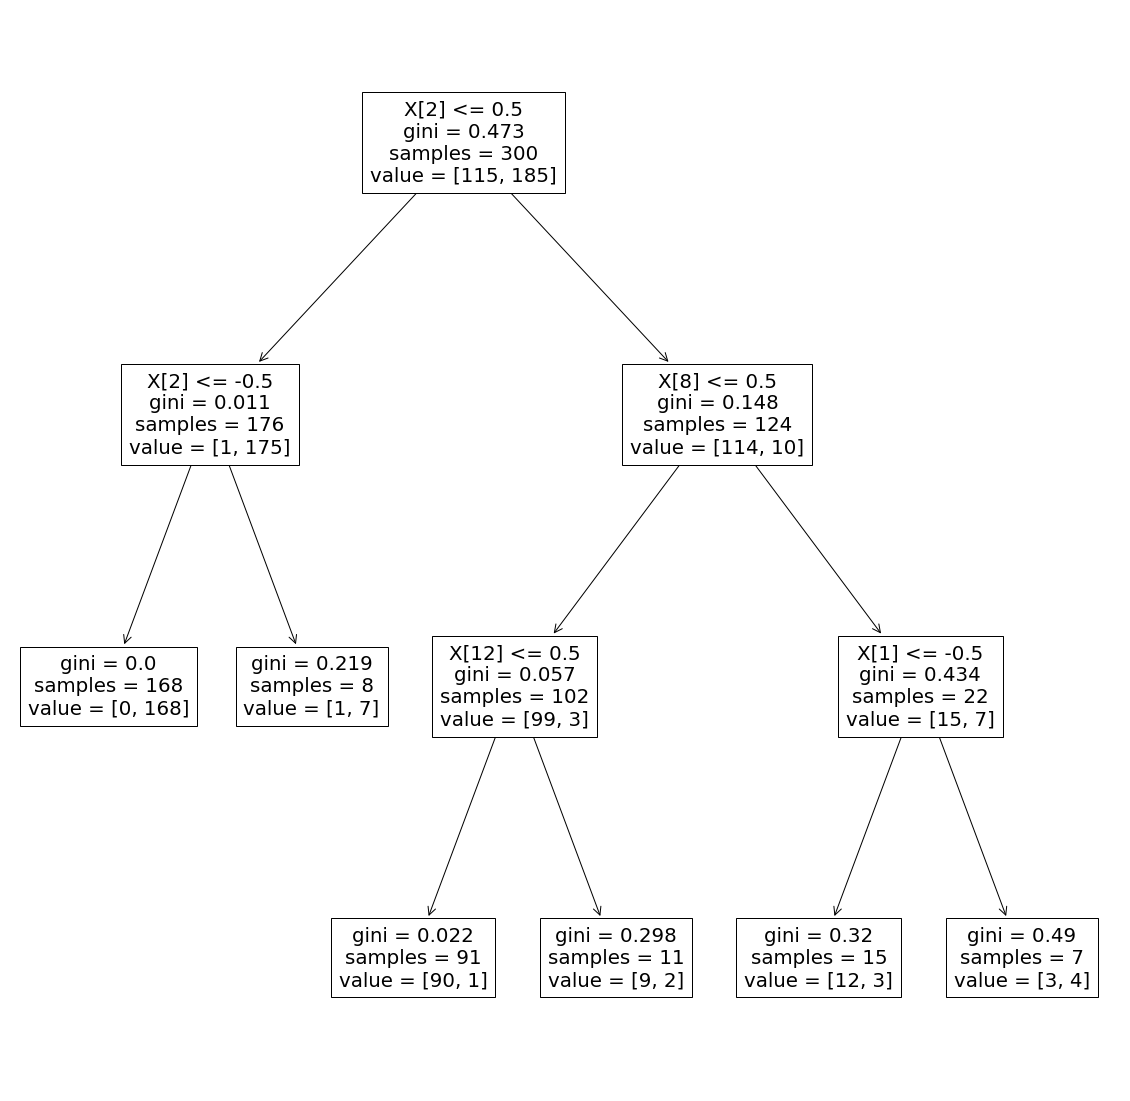

In [147]:
plt.figure(figsize=(20,20))
plot_tree(tree)
plt.show()

In [149]:
X_tt = pd.concat((X_train, X_test))
y_tt = np.concatenate((y_train, y_test), axis=0)
cross_val_score(tree, X_tt, y_tt)

array([0.97058824, 0.94117647, 0.94117647, 0.97058824, 0.95522388])

In [150]:
tree.score(X_val, y_val)

0.9777777777777777

### Bayes

In [154]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9230769230769231

In [155]:
cross_val_score(nb, X_tt, y_tt)

array([0.94117647, 0.97058824, 0.92647059, 0.92647059, 0.94029851])